In [6]:
import os
import numpy as np
import pandas as pd
import torch
import os.path as osp
import json
import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
from tqdm import tqdm
import glob
import pickle
IMG_DIR = '/mnt/chicm/data/open-images/train/imgs'
MASK_DIR = '/mnt/chicm/data/open-images/masks/train'
DATA_DIR = '/mnt/chicm/data/open-images/segmentation'

In [104]:
img_files = glob.glob(IMG_DIR + '/**/*.jpg')
fullpath_dict = {}
for fn in img_files:
    fullpath_dict[osp.basename(fn).split('.')[0]] = osp.join(osp.basename(osp.dirname(fn)), fn)


In [2]:
!ls

challenge-2019-classes-description-segmentable.csv
challenge-2019-label300-segmentable-hierarchy.json
challenge-2019-train-segmentation-bbox.csv
challenge-2019-train-segmentation-labels.csv
challenge-2019-train-segmentation-masks.csv
challenge-2019-validation-segmentation-bbox.csv
challenge-2019-validation-segmentation-labels.csv
challenge-2019-validation-segmentation-masks.csv
eda.ipynb
open-images-2019-instance-segmentation.zip
sample_empty_submission.csv
sample_truncated_submission.csv
test.zip
top_classes.csv


In [115]:
df_des = pd.read_csv('challenge-2019-classes-description-segmentable.csv', names=['class', 'name'])
df_des.head()

,class,name
0,/m/01bms0,Screwdriver
1,/m/03jbxj,Light switch
2,/m/0jy4k,Doughnut
3,/m/09gtd,Toilet paper
4,/m/01j5ks,Wrench


In [118]:
class_dict = df_des.set_index('class').to_dict()['name']

In [7]:
with open('challenge-2019-label300-segmentable-hierarchy.json', 'r') as f:
    h = json.load(f)

In [15]:
 'Subcategory': [{'LabelName': '/m/0242l'},
h

{'LabelName': '/m/0bl9f',
 'Subcategory': [{'LabelName': '/m/0242l'},
  {'LabelName': '/m/03120'},
  {'LabelName': '/m/0138tl',
   'Subcategory': [{'LabelName': '/m/01j51'},
    {'LabelName': '/m/029b3'},
    {'LabelName': '/m/02zt3'},
    {'LabelName': '/m/0kmg4'}]},
  {'LabelName': '/m/0174k2'},
  {'LabelName': '/m/01k6s3'},
  {'LabelName': '/m/029bxz'},
  {'LabelName': '/m/03s_tn'},
  {'LabelName': '/m/0fx9l'},
  {'LabelName': '/m/02f9f_'},
  {'LabelName': '/m/02jz0l'},
  {'LabelName': '/m/09g1w'},
  {'LabelName': '/m/01lsmm'},
  {'LabelName': '/m/025dyy'},
  {'LabelName': '/m/02d9qx'},
  {'LabelName': '/m/03m3vtv'},
  {'LabelName': '/m/05gqfk'},
  {'LabelName': '/m/09gtd'},
  {'LabelName': '/m/0frqm'},
  {'LabelName': '/m/0k1tl'},
  {'LabelName': '/m/02w3r3'},
  {'LabelName': '/m/034c16'},
  {'LabelName': '/m/01_5g'},
  {'LabelName': '/m/02d1br'},
  {'LabelName': '/m/03v5tg'},
  {'LabelName': '/m/04ctx'},
  {'LabelName': '/m/0cmx8'},
  {'LabelName': '/m/01fh4r'},
  {'LabelName': '/

In [135]:
leaf_classes = []
parent_classes = []
parent_dict = {}

def travel(root, parent=[]):
    if 'Subcategory' in root:
        parent_classes.append(root['LabelName'])
        for c in root['Subcategory']:
            travel(c, parent+[root['LabelName']])
    else:
        leaf_classes.append(root['LabelName'])
        parent_dict[root['LabelName']] = parent

travel(h)

In [42]:
sorted(leaf_classes)

['/m/011k07',
 '/m/0120dh',
 '/m/01226z',
 '/m/012n7d',
 '/m/014j1m',
 '/m/01599',
 '/m/015qff',
 '/m/015wgc',
 '/m/015x4r',
 '/m/015x5n',
 '/m/0162_1',
 '/m/016m2d',
 '/m/0174k2',
 '/m/0176mf',
 '/m/01940j',
 '/m/019w40',
 '/m/01_5g',
 '/m/01b638',
 '/m/01b9xk',
 '/m/01bfm9',
 '/m/01bjv',
 '/m/01bl7v',
 '/m/01bms0',
 '/m/01bqk0',
 '/m/01btn',
 '/m/01c648',
 '/m/01cmb2',
 '/m/01d40f',
 '/m/01dwsz',
 '/m/01dwwc',
 '/m/01dxs',
 '/m/01dy8n',
 '/m/01f8m5',
 '/m/01f91_',
 '/m/01fb_0',
 '/m/01fh4r',
 '/m/01gkx_',
 '/m/01h44',
 '/m/01h8tj',
 '/m/01j3zr',
 '/m/01j51',
 '/m/01j5ks',
 '/m/01jfm_',
 '/m/01k6s3',
 '/m/01kb5b',
 '/m/01lcw4',
 '/m/01lsmm',
 '/m/01m2v',
 '/m/01m4t',
 '/m/01n4qj',
 '/m/01nq26',
 '/m/01pns0',
 '/m/01rkbr',
 '/m/01s55n',
 '/m/01tcjp',
 '/m/01x3jk',
 '/m/01x_v',
 '/m/01xq0k1',
 '/m/01xqw',
 '/m/01xs3r',
 '/m/01xyhv',
 '/m/01yrx',
 '/m/01yx86',
 '/m/01z1kdw',
 '/m/020lf',
 '/m/021mn',
 '/m/0242l',
 '/m/024g6',
 '/m/025dyy',
 '/m/025nd',
 '/m/025rp__',
 '/m/026qbn5',
 '/m/

In [140]:
parent_dict['/m/029b3']

['/m/0bl9f', '/m/0138tl']

In [136]:
len(leaf_classes)

276

In [137]:
len(parent_classes)

26

In [27]:
parent_classes

['/m/0bl9f',
 '/m/0138tl',
 '/m/02crq1',
 '/m/01x3z',
 '/m/06msq',
 '/m/01mqdt',
 '/m/01g317',
 '/m/0dv77',
 '/m/0l515',
 '/m/0c9ph5',
 '/m/0k4j',
 '/m/0k5j',
 '/m/02dl1y',
 '/m/02wv6h6',
 '/m/0174n1',
 '/m/07mhn',
 '/m/0hf58v5',
 '/m/015p6',
 '/m/01lrl',
 '/m/01dws',
 '/m/06bt6',
 '/m/09dzg',
 '/m/0ch_cf',
 '/m/018xm',
 '/m/0dv9c',
 '/m/0271t']

In [28]:
df_box = pd.read_csv('challenge-2019-train-segmentation-bbox.csv')

In [45]:
df_box.head()

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf
0,5f866de5eeff2ea9,/m/04dr76w,0.259375,0.336250,0.893697,0.999059,0
1,5f866de5eeff2ea9,/m/04dr76w,0.275000,0.363125,0.750706,0.952963,0
2,5f866de5eeff2ea9,/m/04dr76w,0.322500,0.423750,0.921919,0.999059,0
3,5f866de5eeff2ea9,/m/04dr76w,0.323750,0.404375,0.561618,0.781750,0
4,5f866de5eeff2ea9,/m/04dr76w,0.368750,0.451875,0.763876,0.927563,0


In [29]:
df_box.shape

(5984294, 7)

In [46]:
len(df_box.LabelName.unique())

300

In [51]:
len(df_box.ImageID.unique())

1242734

In [7]:
df_masks = pd.read_csv(osp.join(DATA_DIR, 'challenge-2019-train-segmentation-masks.csv'))
df_masks.head()


,MaskPath,ImageID,LabelName,BoxID,BoxXMin,BoxXMax,BoxYMin,BoxYMax,PredictedIoU,Clicks
0,ccead8c5906e6e11_m09ddx_a881dc5b.png,ccead8c5906e6e11,/m/09ddx,a881dc5b,0.319531,0.657812,0.328271,0.738318,0.88407,0.62748 0.63862 0;0.44461 0.72795 1;0.44990 0....
1,88e582a7b14e34a8_m039xj__6133896f.png,88e582a7b14e34a8,/m/039xj_,6133896f,0.756250,0.810625,0.326797,0.442577,0.76044,0.76475 0.42231 0;0.79720 0.32467 1;0.76502 0....
2,280849e5239012cb_m0342h_c420399e.png,280849e5239012cb,/m/0342h,c420399e,0.000000,0.513950,0.600586,0.739258,0.88397,0.00690 0.67839 1;0.11382 0.62844 0;0.08955 0....
3,6533d5bbc139857d_m0342h_9466984b.png,6533d5bbc139857d,/m/0342h,9466984b,0.115625,0.312500,0.414634,0.605066,0.57796,0.17948 0.51202 1;0.22844 0.50576 0;0.17219 0....
4,74362934ae874b7d_m083wq_0e0c104e.png,74362934ae874b7d,/m/083wq,0e0c104e,0.006250,0.081875,0.470833,0.635833,0.83177,0.00726 0.56089 1;0.06891 0.61937 1;0.07646 0....


In [9]:
df_masks.shape

(2125530, 10)

In [77]:
len(df_masks.ImageID.unique())

848512

In [30]:
df_labels = pd.read_csv('challenge-2019-train-segmentation-labels.csv')

In [31]:
df_labels.head()

,ImageID,LabelName,Confidence
0,75b88edfc847ca14,/m/083wq,0
1,e43fa7c1c630c560,/m/0k4j,0
2,5cc33103845e5519,/m/05z6w,1
3,c7ce47d3312f1b3e,/m/0283dt1,0
4,9a83163e5073e374,/m/083wq,0


In [35]:
len(df_masks.LabelName.unique())

300

In [36]:
label_names = set(df_masks.LabelName.unique())

(set(parent_classes) | set(leaf_classes)) - label_names


{'/m/0bl9f'}

In [38]:
len(set(parent_classes) | set(leaf_classes))

301

In [56]:
df_leaf = df_masks.loc[df_masks.LabelName.isin(set(leaf_classes))]

In [58]:
df_parent = df_masks.loc[df_masks.LabelName.isin(set(parent_classes))]

In [57]:
df_counts = pd.DataFrame(df_leaf.LabelName.value_counts())
df_counts.index.name = 'class'
df_counts.columns =['count']
df_counts.head()
df_counts.to_csv('top_classes_level1.csv', index=True)

In [143]:
len(parent_classes)

26

In [59]:
df_counts = pd.DataFrame(df_parent.LabelName.value_counts())
df_counts.index.name = 'class'
df_counts.columns =['count']
df_counts.head()
df_counts.to_csv('top_classes_parent.csv', index=True)

In [13]:
def get_top_classes(start_index, end_index):
    df = pd.read_csv('top_classes_level1.csv')
    c = df['class'].values[start_index:end_index]
    #print(df.head())
    stoi = { c[i]: i for i in range(len(c)) }
    return c, stoi

In [78]:
classes_0_20, _ = get_top_classes(0, 20)
classes_20_100, _ = get_top_classes(20, 100)
classes_100_276, _ = get_top_classes(100, 276)

In [80]:
imgs_100_276 = set(df_masks.loc[df_mask.LabelName.isin(set(classes_100_276))].ImageID.unique())
imgs_20_100 = set(df_masks.loc[df_mask.LabelName.isin(set(classes_20_100))].ImageID.unique()) - imgs_100_276
imgs_0_20 = set(df_masks.loc[df_mask.LabelName.isin(set(classes_0_20))].ImageID.unique()) - imgs_20_100 - imgs_100_276


In [81]:
print(len(imgs_0_20), len(imgs_20_100), len(imgs_100_276))

415613 164724 68975


In [69]:
df_0_20 = df_masks.loc[df_masks.LabelName.isin(set(classes_0_20))]
print(len(df_0_20), len(df_0_20.ImageID.unique()))

1125789 460281


In [70]:
df_20_100 = df_masks.loc[df_masks.LabelName.isin(set(classes_20_100))]
print(len(df_20_100), len(df_20_100.ImageID.unique()))

327134 171432


In [71]:
df_100_300 = df_masks.loc[df_masks.LabelName.isin(set(classes_100_300))]
print(len(df_100_300), len(df_100_300.ImageID.unique()))

106956 68975


In [11]:
def get_parent_classes(start_index=0, end_index=26):
    df = pd.read_csv('top_classes_parent.csv')
    c = df['class'].values[start_index:end_index]
    #print(df.head())
    stoi = { c[i]: i for i in range(len(c)) }
    return c, stoi

In [147]:
parent_class_0_10, _ = get_parent_classes(0, 10)
parent_class_10_26, _ = get_parent_classes(10, 26)

In [148]:
imgs_10_26 = set(df_masks.loc[df_mask.LabelName.isin(set(parent_class_10_26))].ImageID.unique())
imgs_0_10 = set(df_masks.loc[df_mask.LabelName.isin(set(parent_class_0_10))].ImageID.unique()) - imgs_10_26


In [12]:
df_masks.loc[df_masks.LabelName.isin(set(get_parent_classes()[0]))].LabelName.value_counts()

/m/0k4j       159435
/m/01g317     149166
/m/0c9ph5      89784
/m/0138tl      44162
/m/06msq       26570
/m/015p6       23686
/m/0271t       20735
/m/0ch_cf      12070
/m/02dl1y      10715
/m/07mhn        7289
/m/01mqdt       4162
/m/02crq1       4072
/m/018xm        3150
/m/01lrl        2196
/m/0hf58v5      1910
/m/0k5j         1165
/m/02wv6h6      1055
/m/0l515        1049
/m/0174n1       1022
/m/01x3z         977
/m/06bt6         430
/m/01dws         246
/m/0dv9c         221
/m/0dv77         220
/m/09dzg         164
Name: LabelName, dtype: int64

In [14]:
df_masks.loc[df_masks.LabelName.isin(set(get_top_classes(0, 275)[0]))].LabelName.value_counts()

/m/05r655     173787
/m/083wq      155416
/m/03bt1vf    117234
/m/04yx4      113747
/m/01xyhv     100410
/m/01bl7v      80307
/m/079cl       61076
/m/0fly7       61076
/m/01d40f      47605
/m/01bqk0      43927
/m/04dr76w     24637
/m/0342h       24264
/m/0bt9lr      21934
/m/03120       20748
/m/0cmf2       16662
/m/0fm3zh      14965
/m/01bfm9      12613
/m/0bt_c3      12027
/m/04_sv       11952
/m/01yrx       11402
/m/07r04       10745
/m/0283dt1     10077
/m/09ddx        9912
/m/07jdr        9845
/m/06z37_       9508
/m/03k3r        9031
/m/01rkbr       8953
/m/01bjv        8891
/m/01c648       8449
/m/01xq0k1      7504
               ...  
/m/01f91_        225
/m/0hdln         223
/m/03m3vtv       221
/m/02g30s        213
/m/03v5tg        208
/m/043nyj        201
/m/0fbw6         200
/m/03q5t         192
/m/02w3r3        187
/m/05ctyq        168
/m/02f9f_        167
/m/0frqm         166
/m/01j5ks        163
/m/0d20w4        158
/m/03y6mg        155
/m/06_72j        148
/m/0584n8    

In [16]:
df_masks.loc[df_masks.LabelName.isin(set(get_top_classes(0, 275)[0]))].LabelName.value_counts()[20:100]

/m/07r04      10745
/m/0283dt1    10077
/m/09ddx       9912
/m/07jdr       9845
/m/06z37_      9508
/m/03k3r       9031
/m/01rkbr      8953
/m/01bjv       8891
/m/01c648      8449
/m/01xq0k1     7504
/m/01gkx_      7406
/m/01n4qj      7168
/m/01j51       7046
/m/0h2r6       6876
/m/0dbvp       6331
/m/01599       6169
/m/06m11       5857
/m/02wbtzl     5742
/m/081qc       5650
/m/07fbm7      5471
/m/0fszt       5122
/m/0dv5r       5094
/m/050k8       5072
/m/039xj_      4837
/m/02p5f1q     4688
/m/0ftb8       4426
/m/07j87       4409
/m/025dyy      4401
/m/024g6       4197
/m/01m2v       4017
              ...  
/m/025rp__     2556
/m/06k2mb      2522
/m/021mn       2513
/m/01z1kdw     2439
/m/03q5c7      2375
/m/015qff      2363
/m/0bwd_0j     2360
/m/080hkjn     2294
/m/05z6w       2274
/m/09b5t       2237
/m/0242l       2183
/m/02s195      2164
/m/02h19r      2155
/m/02jvh9      2082
/m/014j1m      2075
/m/02vqfm      2057
/m/07bgp       2051
/m/04m9y       1890
/m/0gv1x       1890


In [149]:
len(imgs_10_26)

15194

In [150]:
len(imgs_0_10)

259609

In [132]:
def get_mask(mask_fn):
    mask = cv2.imread(osp.join(MASK_DIR, mask_fn))
    #print(mask.shape)
    return mask[:,:,0] / 255

In [127]:
m1 = get_mask('280849e5239012cb_m0342h_c420399e.png')

In [130]:
m1.min()

0

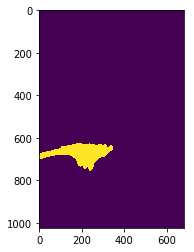

In [97]:
plt.imshow(m1)

In [120]:
def get_truth(idx):
    row = df_masks.iloc[idx]
    img_id = row.ImageID
    df = df_masks.loc[df_masks.ImageID==img_id]
    fn = fullpath_dict[img_id]
    print(fn)
    img = cv2.imread(fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    masks = [get_mask(x) for x in df.MaskPath.values]
    labels = df.LabelName.values
    return img, masks, labels

def show_truth(idx):
    img, masks, labels = get_truth(idx)
    show_img_masks(img, masks, labels)
    
def show_img_masks(img, masks, labels=None):
    columns = 4
    plt.figure(figsize=(20, 15))
    
    plt.subplot(len(masks) / columns + 1, columns, 1)
    plt.imshow(img)
    
    for i, img in enumerate(masks):
        plt.subplot(len(masks) / columns + 1, columns, i+2)
        if labels is not None:
            plt.title(class_dict[labels[i]])
        
        plt.imshow(img)

/mnt/chicm/data/open-images/train/imgs/train_c/ca752fc39936601d.jpg


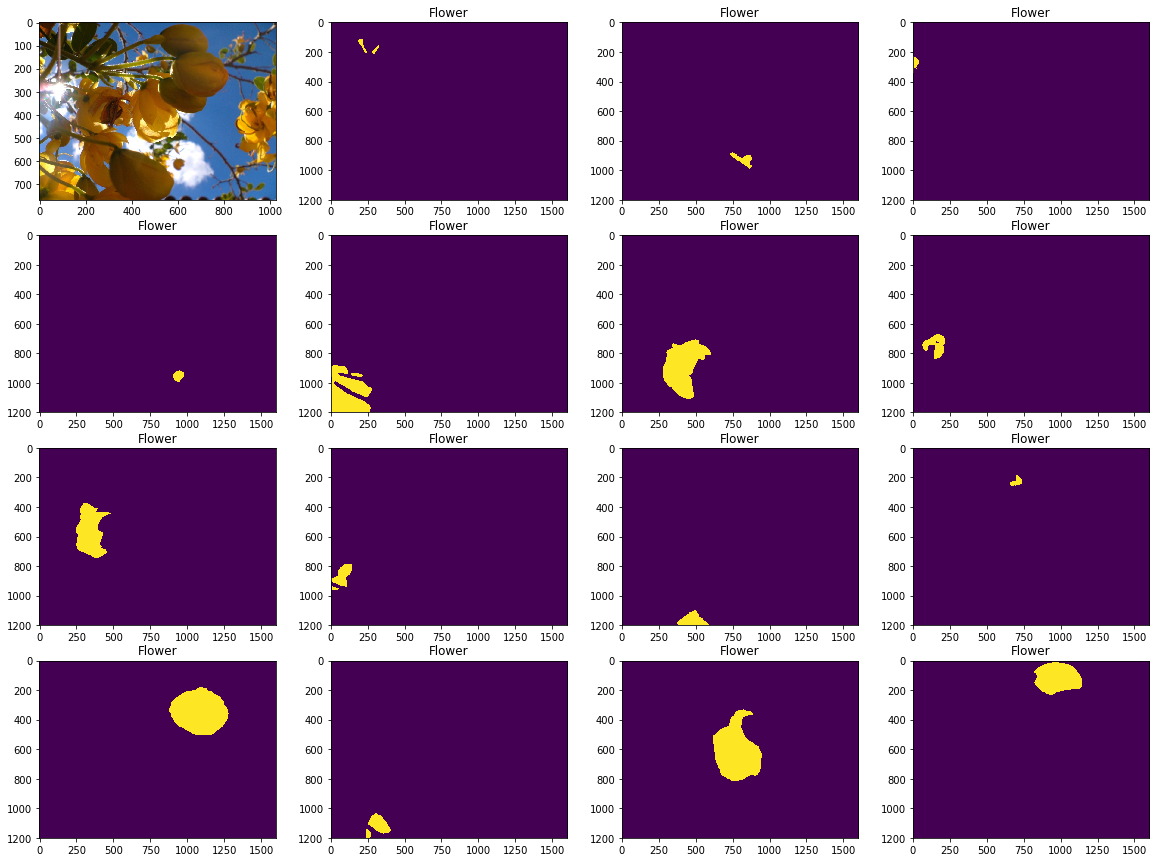

In [133]:
show_truth(10)

/mnt/chicm/data/open-images/train/imgs/train_8/85fdbe3342d5f3dc.jpg


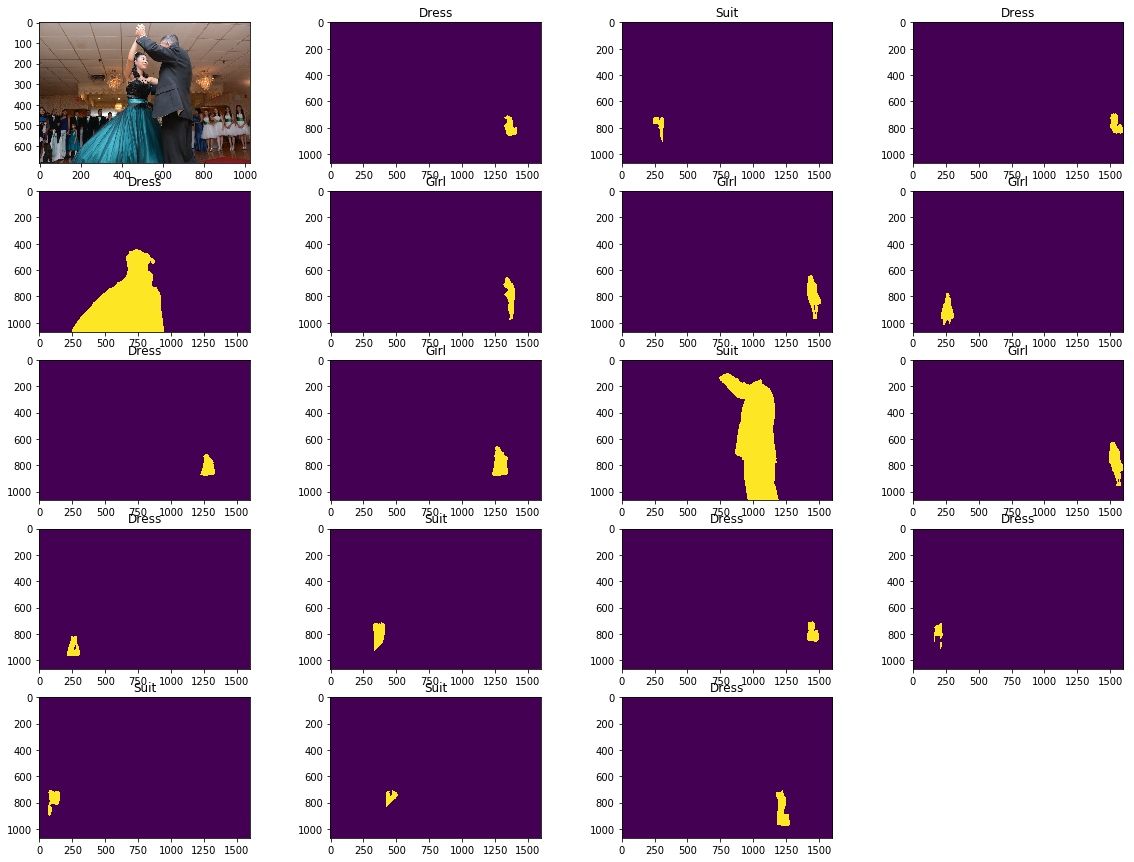

In [126]:
show_truth(1010)

In [134]:
df_test = pd.read_csv('sample_empty_submission.csv')
df_test.head()

,ImageID,ImageWidth,ImageHeight,PredictionString
0,80155d58d0ee19bd,-1,-1,NaN
1,52a76f3fe21185bf,-1,-1,NaN
2,65e9da7c04c8e4cd,-1,-1,NaN
3,6d10fa21d93bd6cc,-1,-1,NaN
4,0841dee573a875ca,-1,-1,NaN
